# 3η Άσκηση Νευροασαφής Έλεγχος

###  Task 1, 2

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot

In [2]:
def ref(x,t):
    theta, omega = x
    theta_c = 5*(t//3)
    dxdt = [omega, -24*theta -10*omega + 24*theta_c]
    return dxdt

In [3]:
t = np.arange(0, 120, 0.01)
print(len(t))
xm0 = [0,0]
xm = odeint(ref, xm0, t)
theta_r, omega_r = xm[:,0], xm[:,1]
theta_c = [5*(time//3) for time in t]
theta_c = np.array(theta_c)

12000


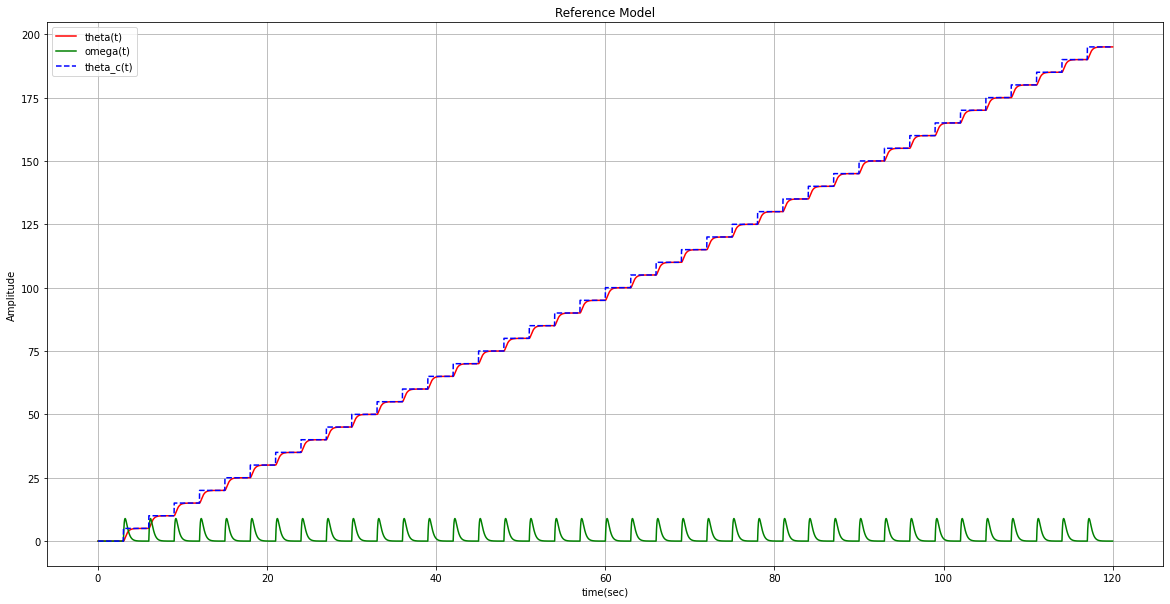

In [4]:
plt.figure(figsize=(20,10))
plt.plot(t, theta_r, 'r', label='theta(t)')
plt.plot(t, omega_r, 'g', label='omega(t)')
plt.plot(t, theta_c, 'b--', label='theta_c(t)')
plt.legend(loc='best')
plt.xlabel('time(sec)')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Reference Model')
plt.show()

In [5]:
def ODEx(x,t,Kx, Kr):
    theta, omega = x
    theta_c = 5* (t//3)
    u = np.dot(Kx.T,x) + Kr *theta_c
    dxdt = [omega,-B/J * omega + K_m/J * u]
    return dxdt

In [6]:
J= 4.5 * 10**(-5)
B = 8 * 10 **(-4)
N = 50
K_m = 0.19
A = np.array([[0,1],[0 , -B/J]])
BL = np.array([[0, K_m/J]]).T

A_m = np.array([[0,1],[-24,-10]])
B_m = np.array([[0,24]]).T


l = [0.05, 0.25, 0.5, 0.75] #uncertainty

#matching conditions
AmA = A_m - A
Kx_ideal = np.array([[AmA[1,0]/BL[1] , AmA[1,1]/BL[1]]]).T
Kr_ideal = B_m[1]/BL[1]

Gx = np.array([[50**(-4),0],[0, 50**(-4)]])
gr = 50**(-4)
Q = np.eye(2) * 10**(-3)


In [7]:
from scipy.linalg import solve_lyapunov
P = solve_lyapunov(A_m.T,-Q)


In [8]:
def Kx(kx, t, x, e, Gx, P, BL):
    x = np.array([[x[0]],[x[1]]])
    e = np.array([[e[0]],[e[1]]]).T
    dkxdt = multi_dot([-Gx, x, e, P, BL])
    return np.squeeze(dkxdt)

In [9]:
def Kr(kr, t, e, gr, P, BL):
    r = 5* (t//3)
    e = np.array([[e[0]],[e[1]]]).T
    dkrdt = -gr*r*multi_dot([e, P, BL])
    return np.squeeze(dkrdt)

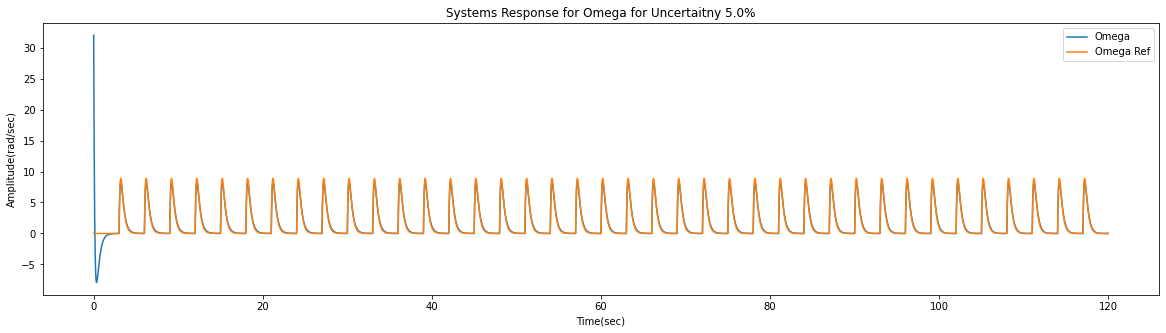

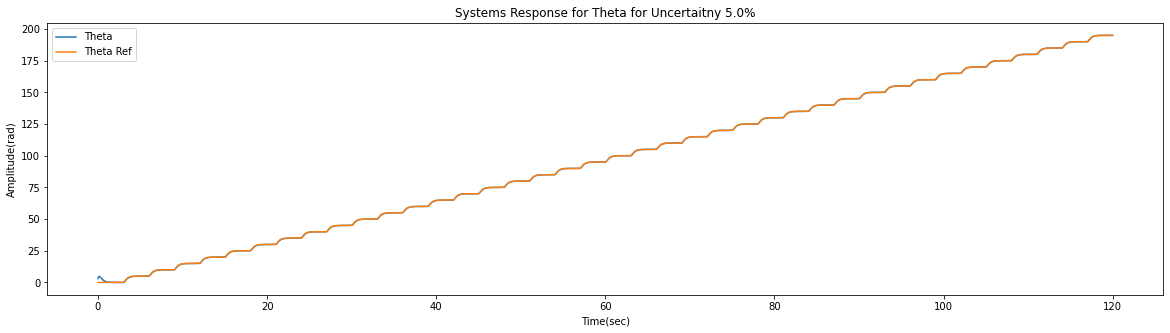

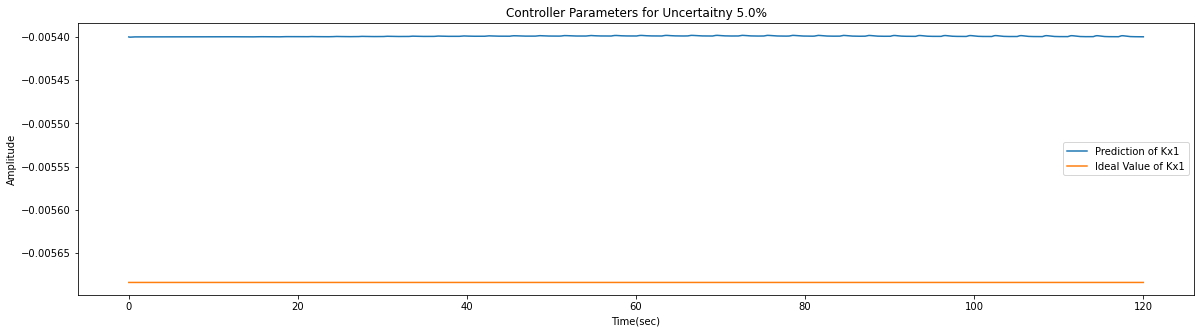

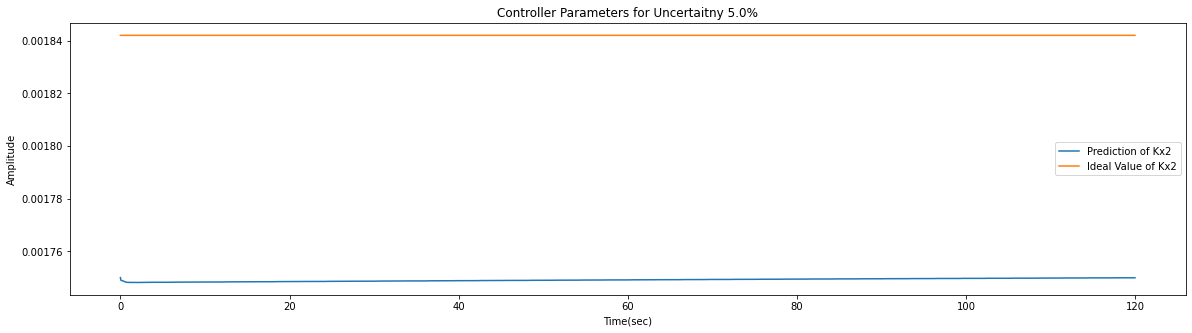

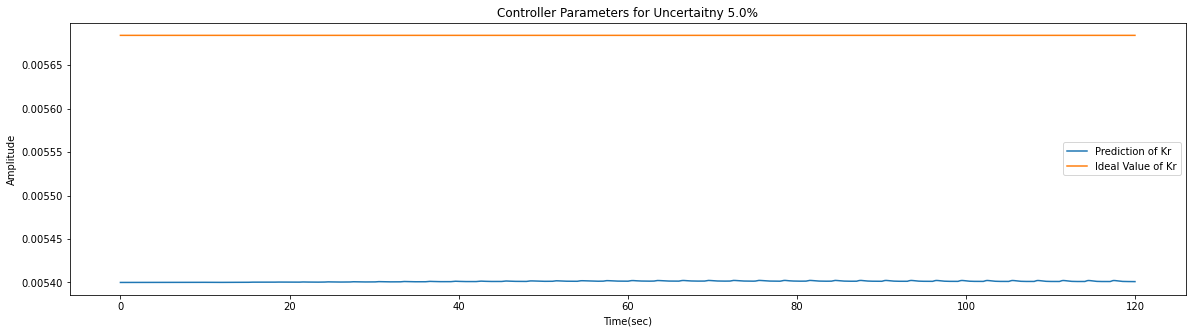

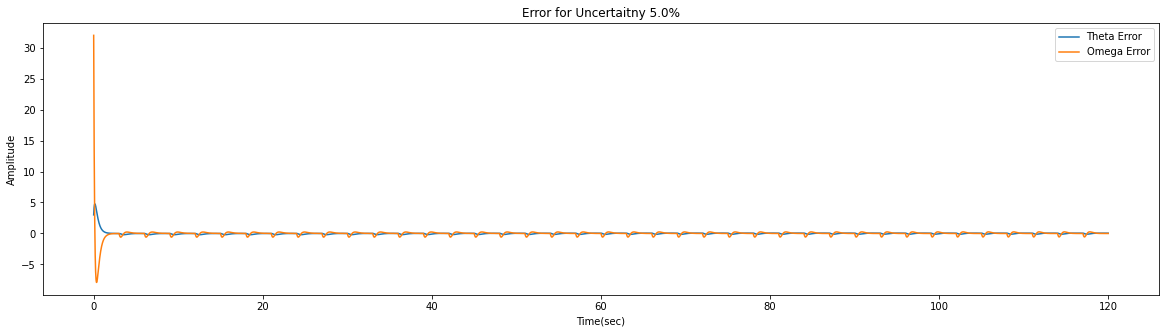

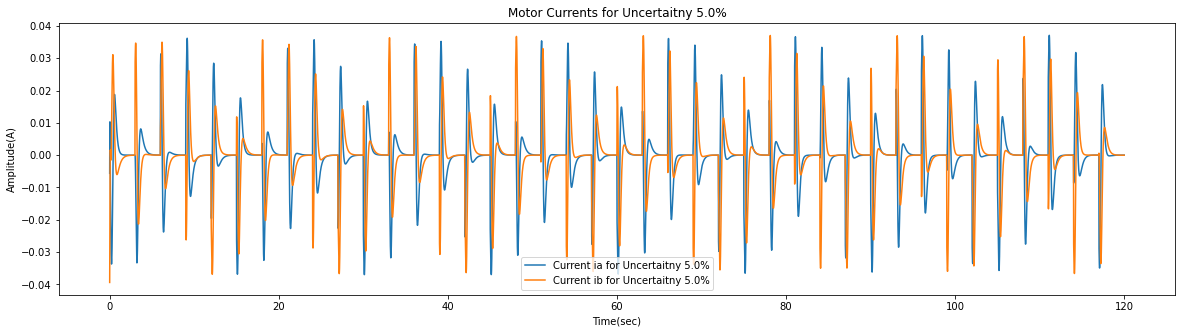

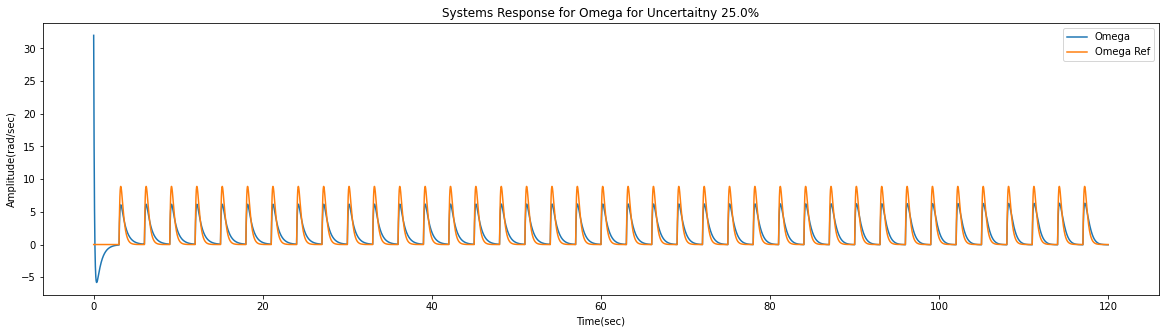

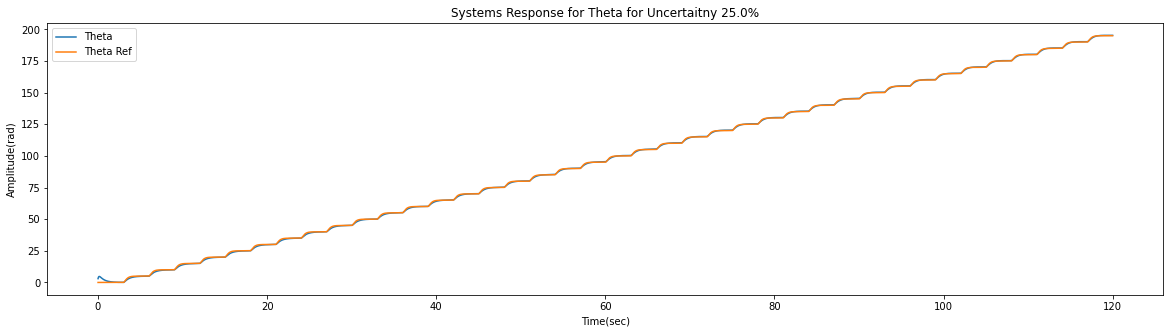

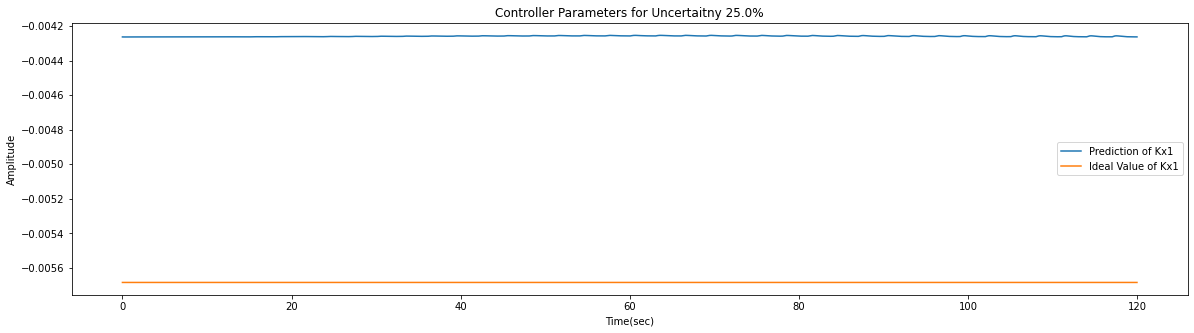

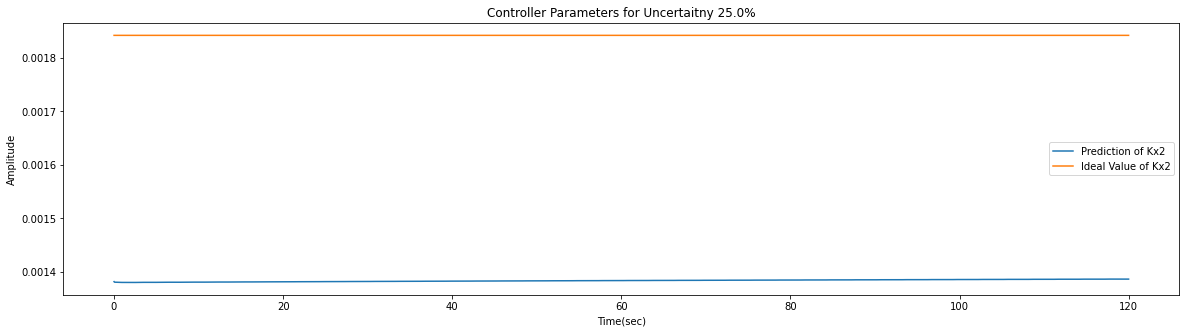

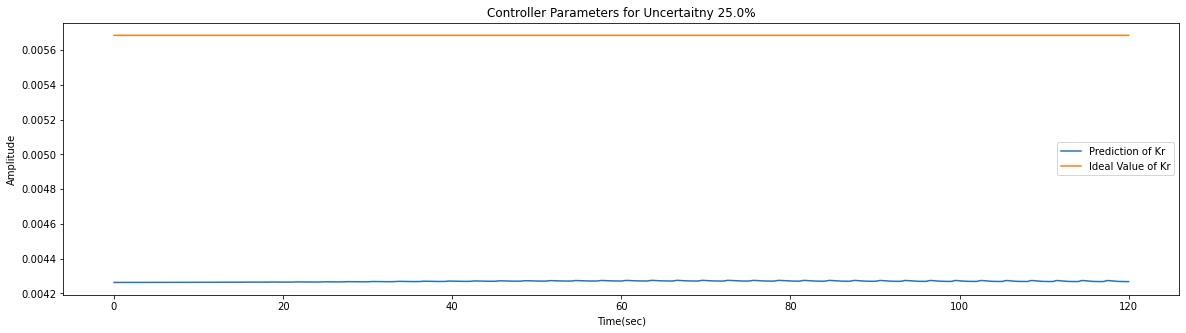

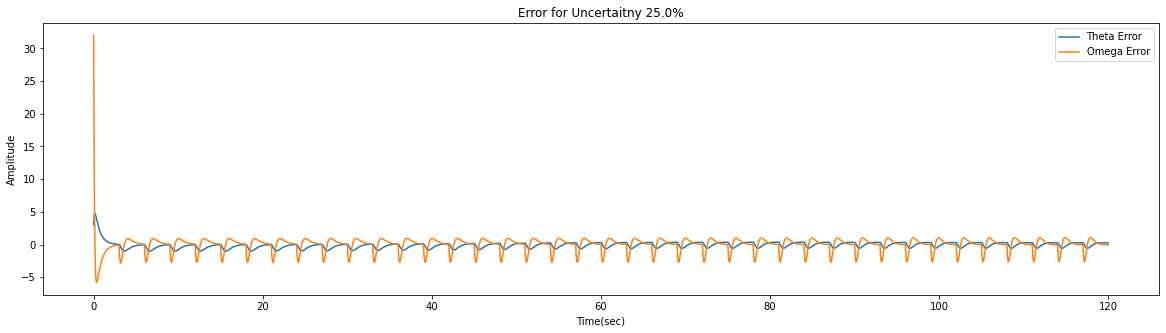

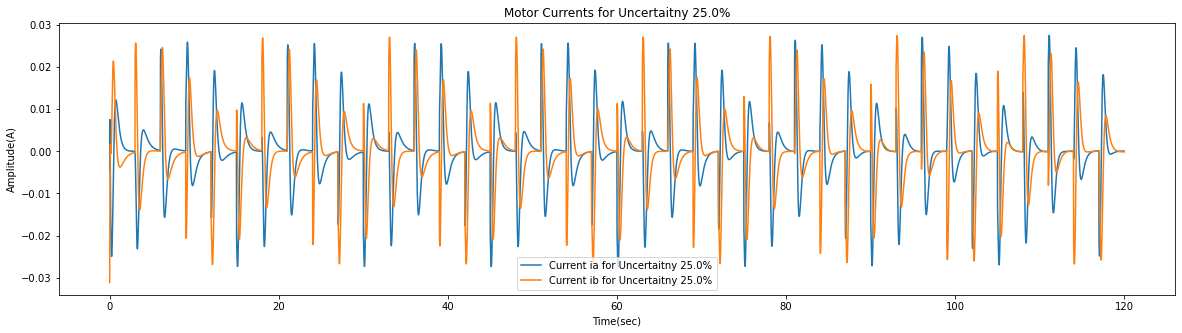

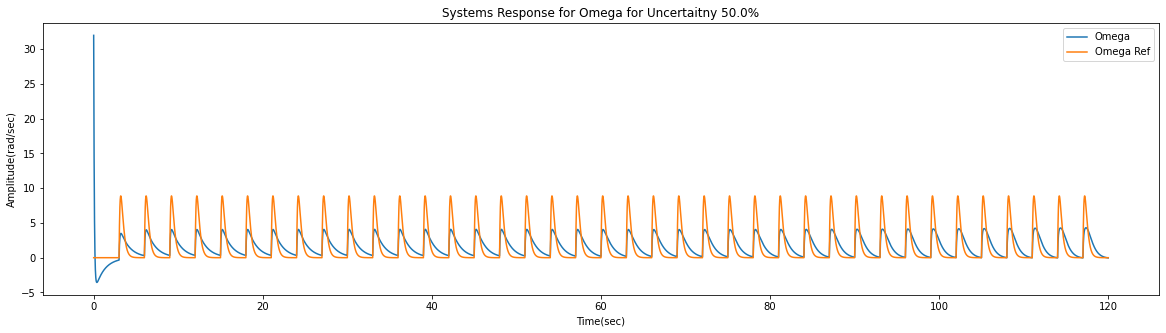

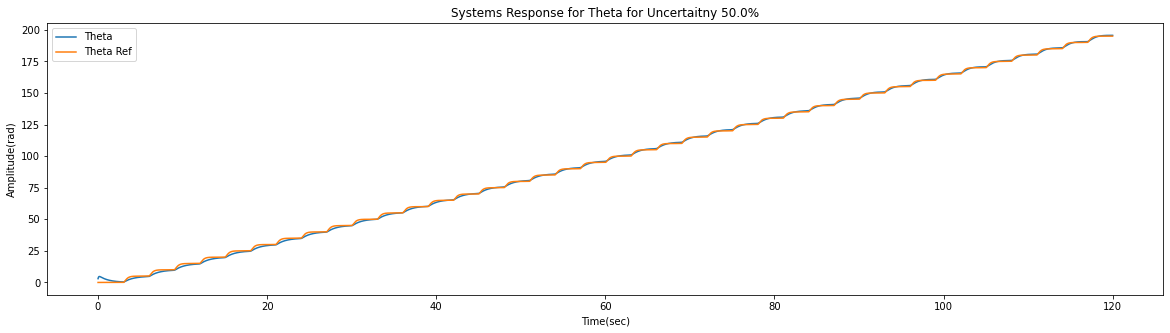

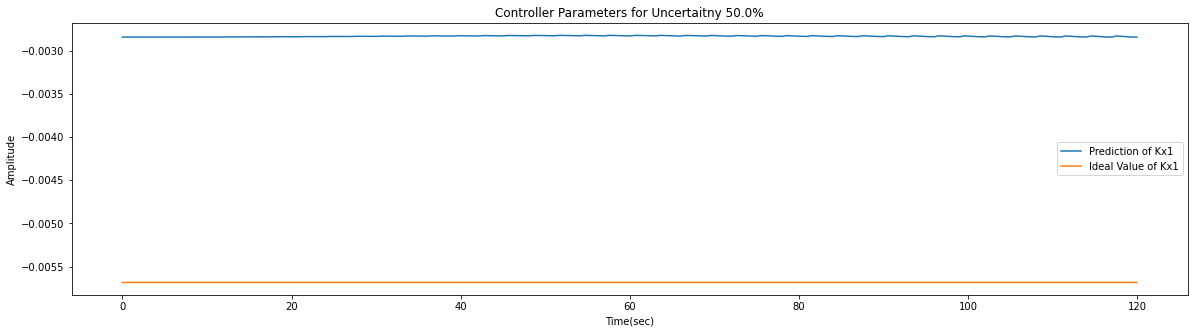

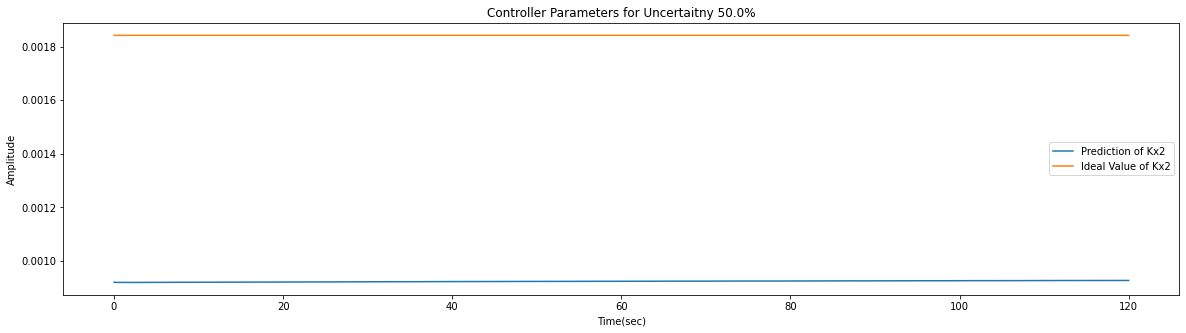

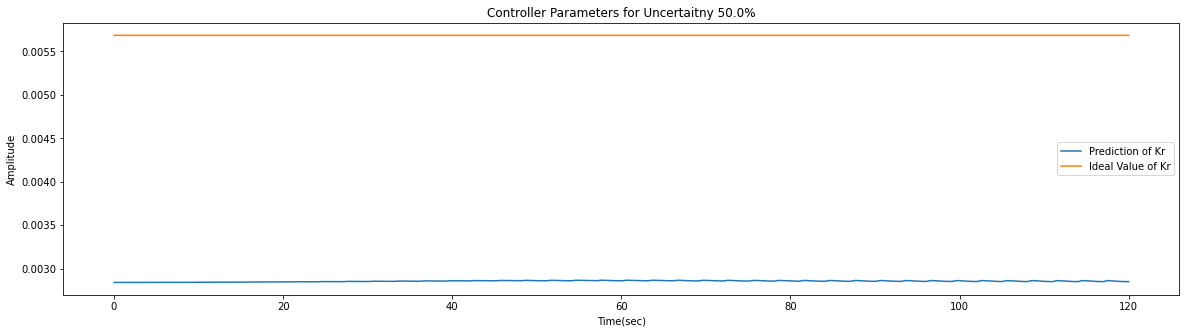

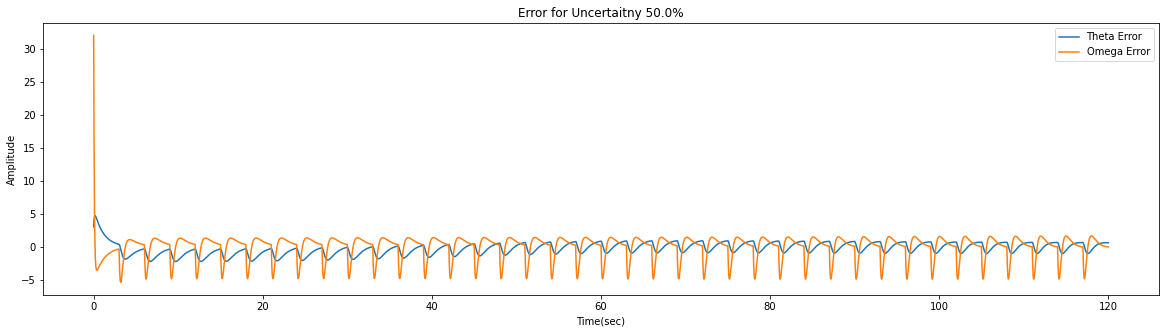

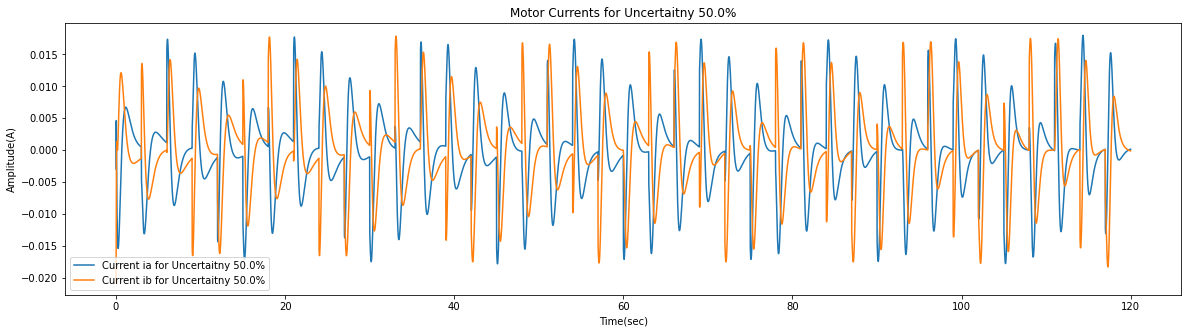

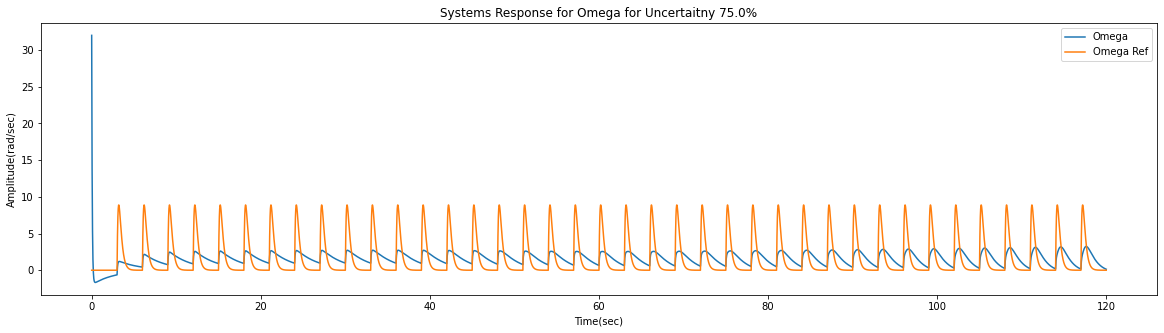

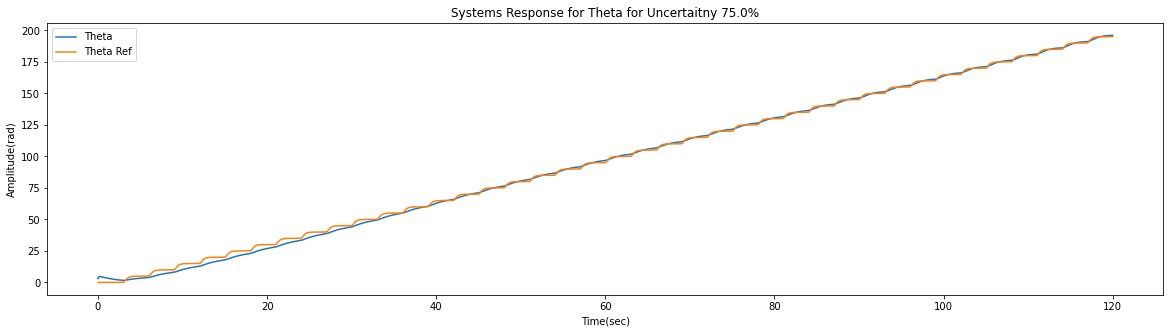

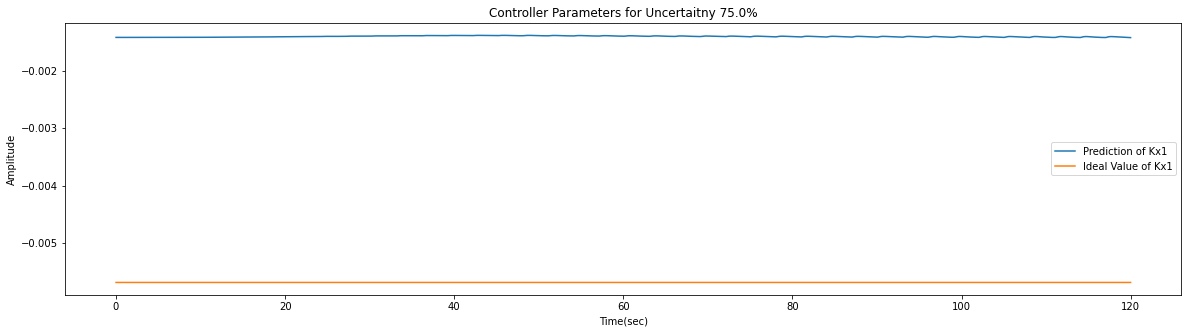

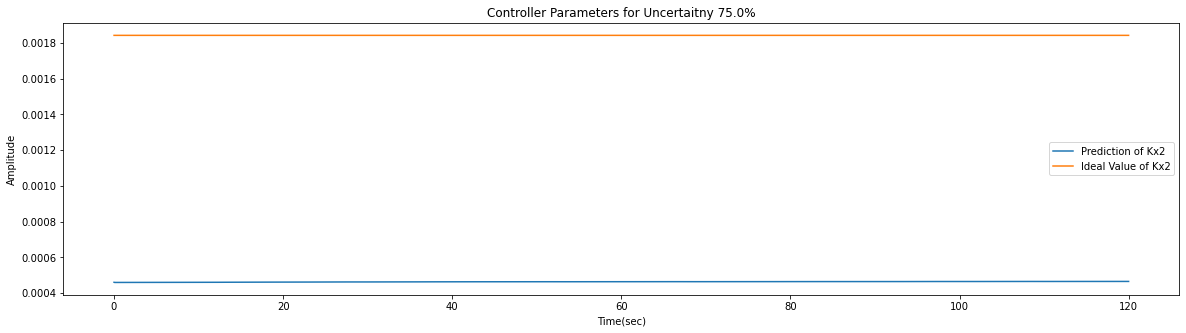

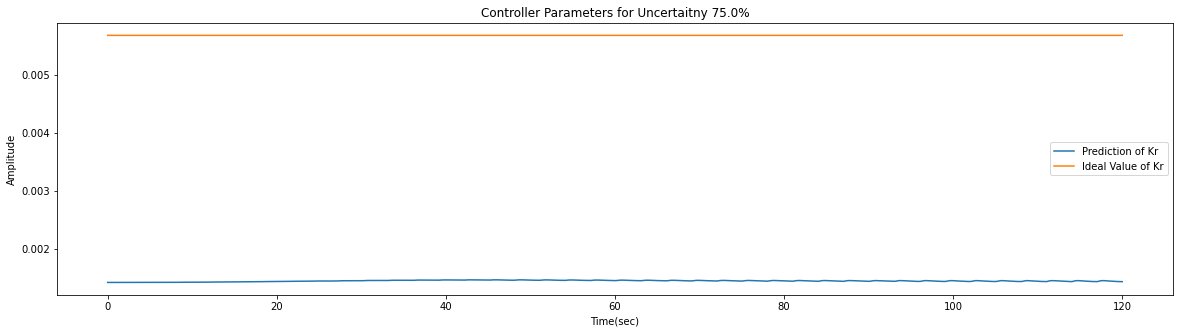

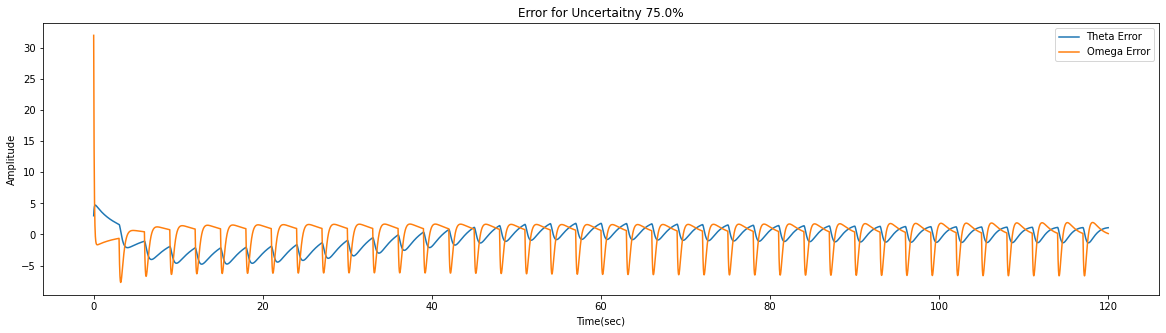

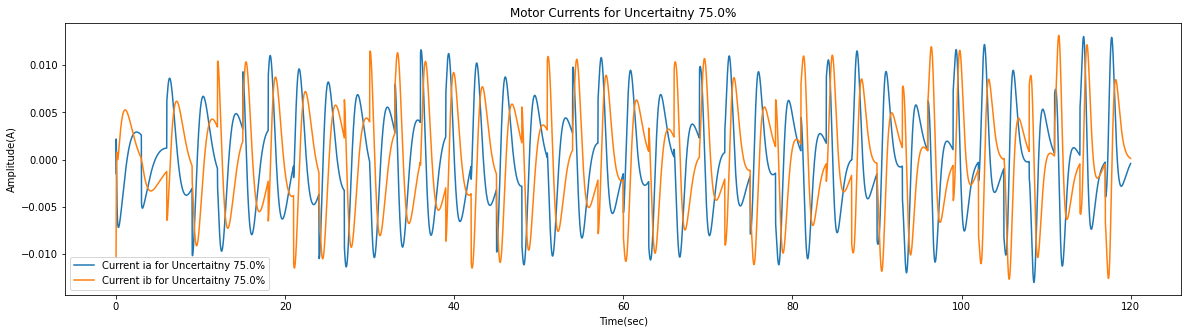

In [10]:
theta = np.empty_like(t)
omega = np.empty_like(t)
e = np.empty((len(t),2))


for a in l:
    
    x0 = [3,32]
    e0 = x0-xm[0]
    xs = []
    xs.append(x0)
    Kx_in = (1-a)*Kx_ideal
    Kr_in = (1-a)*Kr_ideal
    Kx_in = np.squeeze(Kx_in)
    Kr_in = np.squeeze(Kr_in)
    Kxs = []
    Kxs.append(Kx_in)
    Krs = []
    Krs.append(Kr_in)
    theta[0] , omega[0] = x0
    e[0,:] = e0
    kx = Kx_in
    kr = Kr_in
    for i in range(1,len(t)):
        tspan = [t[i-1],t[i]]
        x = odeint(ODEx, x0, tspan, args = (kx,kr))
        error = x[1] - xm[i]
        Kx_in = odeint(Kx, kx, tspan, args=(x[1], error, Gx, P, BL))
        Kr_in = odeint(Kr, kr, tspan, args=(error, gr, P, BL))
        kx = Kx_in[1]
        kr = Kr_in[1]
        Kxs.append(kx)
        Krs.append(np.squeeze(kr))
        e[i] = error
        theta[i] = x[1][0]
        omega[i] = x[1][1]
        xs.append(x[1])
        x0 = x[1]

    Kxs = np.array(Kxs)
    Krs = np.array(Krs)
    u = Kxs[:,0] * theta[:] + Kxs[:,1] * omega[:] + Krs * theta_c
    ia = -u*np.sin(theta)
    ib = u*np.cos(theta)
    
    plt.figure(figsize = (20,5))
    plt.plot(t, omega, label = 'Omega')
    plt.plot(t, omega_r, label = 'Omega Ref')
    plt.title('Systems Response for Omega for Uncertaitny '+ str(a*100)+"%") 
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude(rad/sec)")
    plt.legend(loc='best')
    plt.show()
    
    plt.figure(figsize = (20,5))
    plt.plot(t, theta, label = 'Theta')
    plt.plot(t, theta_r, label = 'Theta Ref')
    plt.title('Systems Response for Theta for Uncertaitny '+ str(a*100)+"%")
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude(rad)")
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize = (20,5))
    plt.plot(t, Kxs[:,0], label = 'Prediction of Kx1')
    plt.plot(t, [np.squeeze(Kx_ideal)[0]]*len(t), label = 'Ideal Value of Kx1')
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude")
    plt.title('Controller Parameters for Uncertaitny '+ str(a*100)+"%")
    plt.legend(loc='best')
    plt.show()
    
    plt.figure(figsize = (20,5))
    plt.plot(t, Kxs[:,1], label = 'Prediction of Kx2')
    plt.plot(t, [np.squeeze(Kx_ideal)[1]]*len(t), label = 'Ideal Value of Kx2')
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude")
    plt.title('Controller Parameters for Uncertaitny '+ str(a*100)+"%")
    plt.legend(loc='best')
    plt.show()
    
    plt.figure(figsize = (20,5))
    plt.plot(t, Krs, label = 'Prediction of Kr')
    plt.plot(t, [Kr_ideal]*len(t), label = 'Ideal Value of Kr')
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude")
    plt.title('Controller Parameters for Uncertaitny '+ str(a*100)+"%")
    plt.legend(loc='best')
    plt.show()
    
    plt.figure(figsize = (20,5))
    plt.plot(t, e[:,0], label = "Theta Error")
    plt.plot(t, e[:,1], label = "Omega Error")
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude")
    plt.title('Error for Uncertaitny '+ str(a*100)+"%")
    plt.legend(loc='best')
    plt.show()
    
    plt.figure(figsize=(20,5))
    plt.plot(t, ia, label = 'Current ia for Uncertaitny '+ str(a*100)+"%")
    plt.plot(t, ib, label = 'Current ib for Uncertaitny '+ str(a*100)+"%")
    plt.title('Motor Currents for Uncertaitny '+ str(a*100)+"%")
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude(A)")
    plt.legend(loc='best')
    plt.show()
    


### Task 3


In [11]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [12]:
#https://pythonmachinelearning.pro/using-neural-networks-for-regression-radial-basis-function-networks/
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """
 
    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False
 
    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
 
        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)
 
        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)
 
        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()
 
    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
 
    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])
 
    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
 
    return clusters, stds

In [13]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
 
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
        
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b

                loss = (y[i] - F).flatten() ** 2
#                 print('Loss: {0:.2f}'.format(loss[0]))

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
    
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

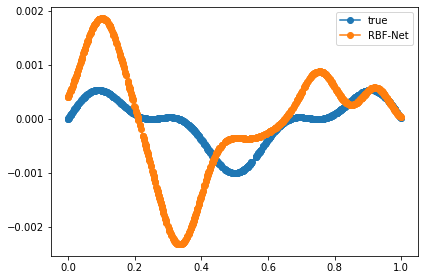

In [14]:
NUM_SAMPLES = 1000
X = np.random.uniform(0., 1, NUM_SAMPLES)
X = np.sort(X, axis=0)
y = 10**(-3) * (np.cos(2*np.pi*X))**2 * np.sin(3*np.pi* X)
  
rbfnet = RBFNet(lr=0.1, k=5, epochs = 2000)
rbfnet.fit(X, y)
 
y_pred = rbfnet.predict(X)
 
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
 
plt.tight_layout()
plt.show()

In [15]:
from numpy import linalg as LA
def Kx2(kx, t, x, e, Gx, P, BL, sx):
    x = np.array([[x[0]],[x[1]]])#2x1
    e = np.array([[e[0]],[e[1]]]).T#1x2
    kx = np.array([[kx[0]], [kx[1]]])
    norm = LA.norm(multi_dot((e, P, BL)))
    dkxdt = np.dot(-Gx, multi_dot([x, e, P, BL]) + sx*norm*kx)
    return np.squeeze(dkxdt)

def Kr2(kr, t, e, gr, P, BL, sr):
    r = 5* (t//3)
    e = np.array([[e[0]],[e[1]]]).T
    norm = LA.norm(multi_dot((e, P, BL)))
    dkrdt = -gr*(r*multi_dot([e, P, BL]) + sx*norm*kr)
    return np.squeeze(dkrdt)

def Th(th, t, x, e, Gth, P, BL, sth, centers, stds, k):
    th = np.array([[th[0]], [th[1]], [th[3]], [th[3]], [th[4]]])
    Fx=np.zeros((5,1))
    for i in range(k):
        Fx[i] = rbf(x[0],centers[i],stds[i])
    x = np.array([[x[0]],[x[1]]])#2x1
    e = np.array([[e[0]],[e[1]]]).T#1x2
    norm = LA.norm(multi_dot((e, P, BL)))
    dthdt = np.dot(-Gth, multi_dot([Fx, e, P, BL]) + sth*norm*th)
    return np.squeeze(dthdt)
    
def ODEx2(x,t,Kx, Kr, Kth, centers, stds, k):
    theta, omega = x
    x = np.array([[x[0]],[x[1]]])#2x1
    Kx = np.array([[Kx[0]],[Kx[1]]])#2x1
    theta_c = 5* (t//3)
    Fx=np.zeros((5,1))
    for i in range(k):
        Fx[i] = rbf(theta,centers[i],stds[i])
    fx = 10**(-3) * (np.cos(2*theta))**2 * np.sin(3*theta)
    u = np.dot(Kx.T,x) + Kr *theta_c + np.dot((Kth.T),Fx)
    dxdt = [omega,-B/J * omega + K_m/J * (u-(fx /K_m))]
    return dxdt

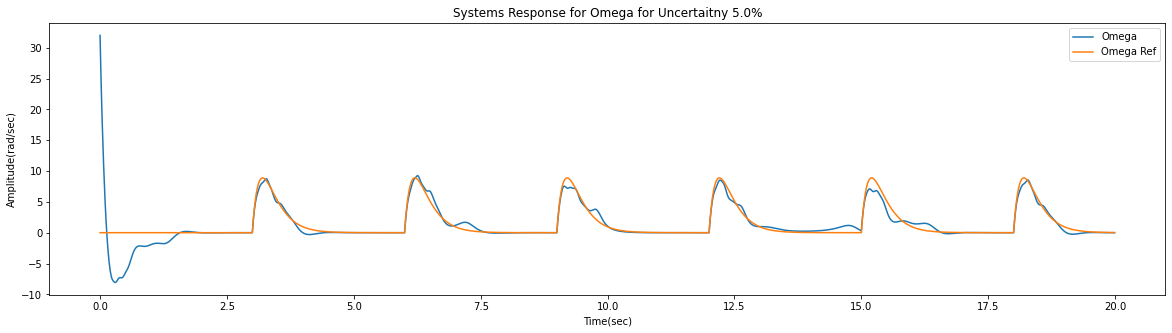

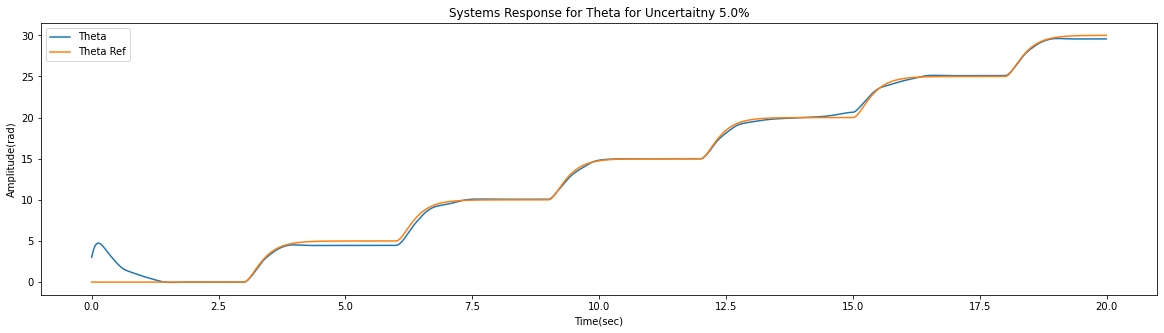

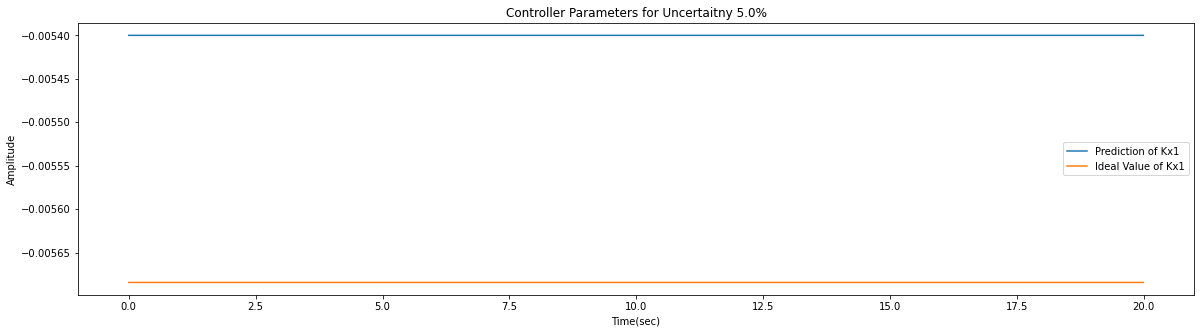

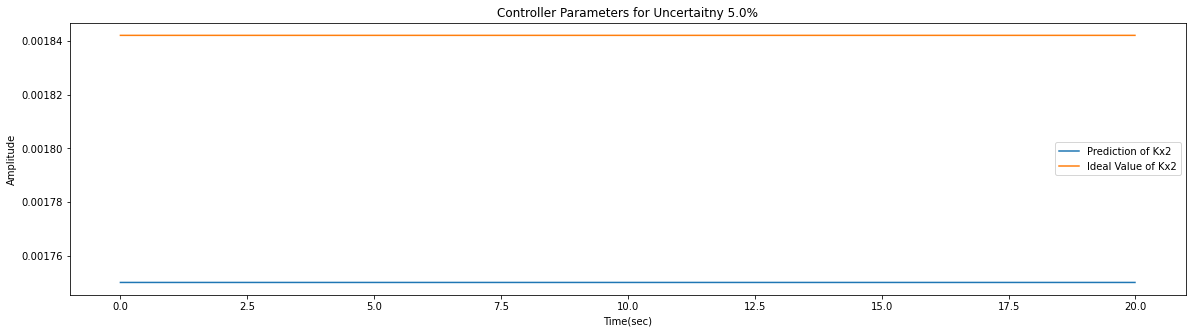

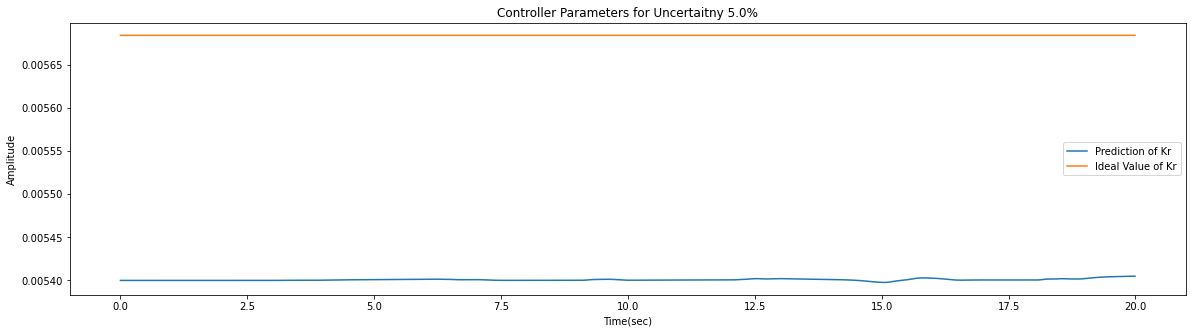

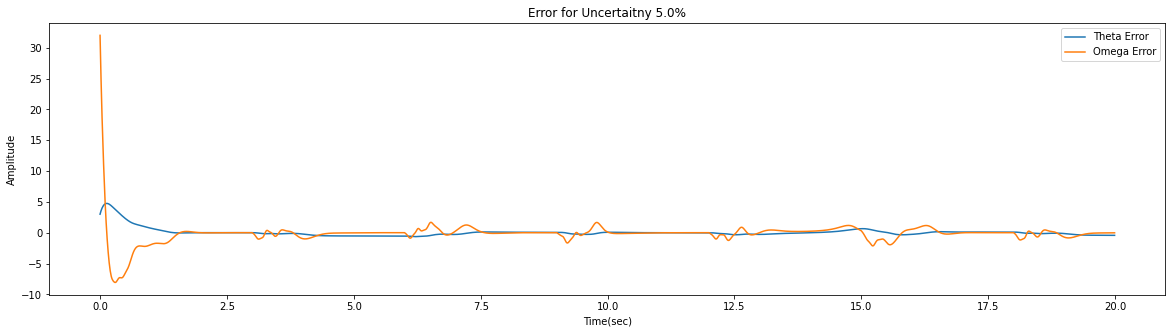

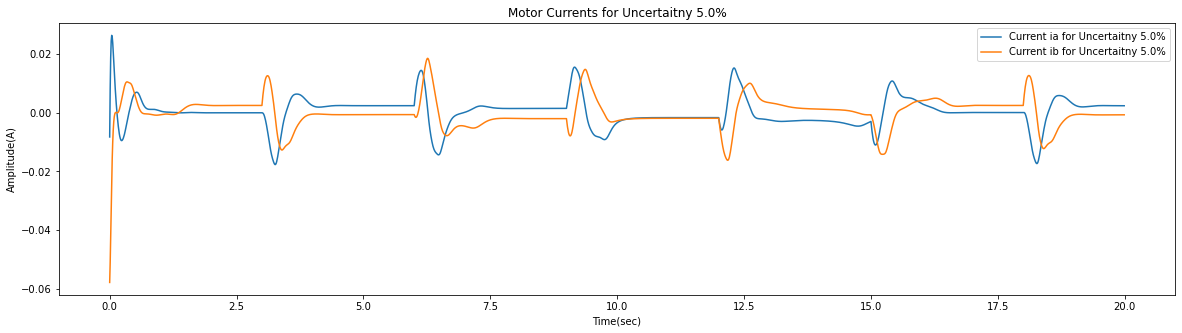

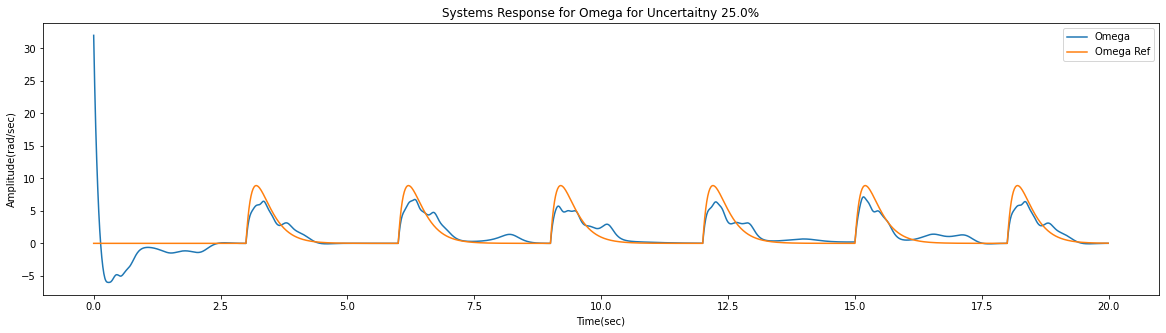

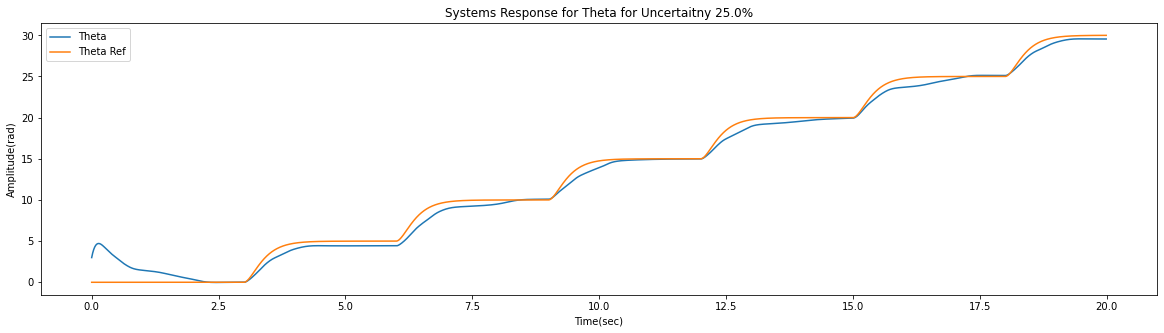

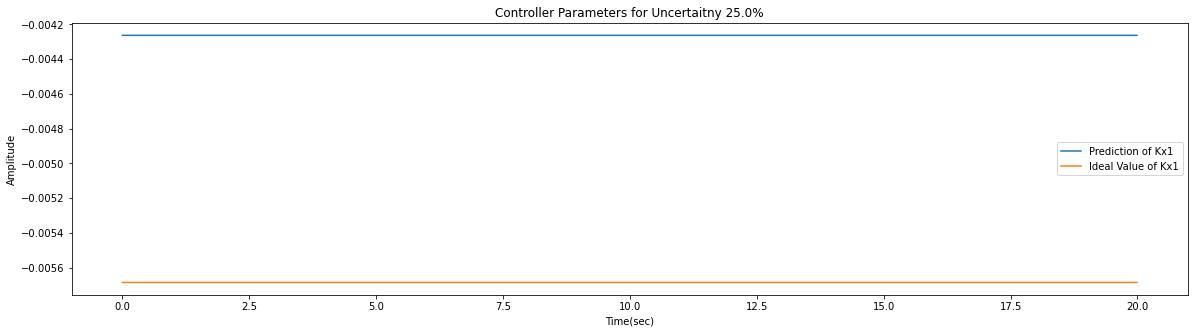

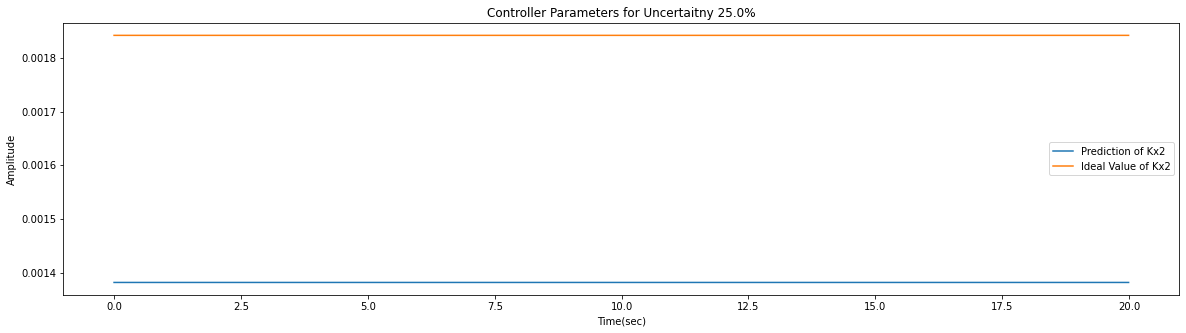

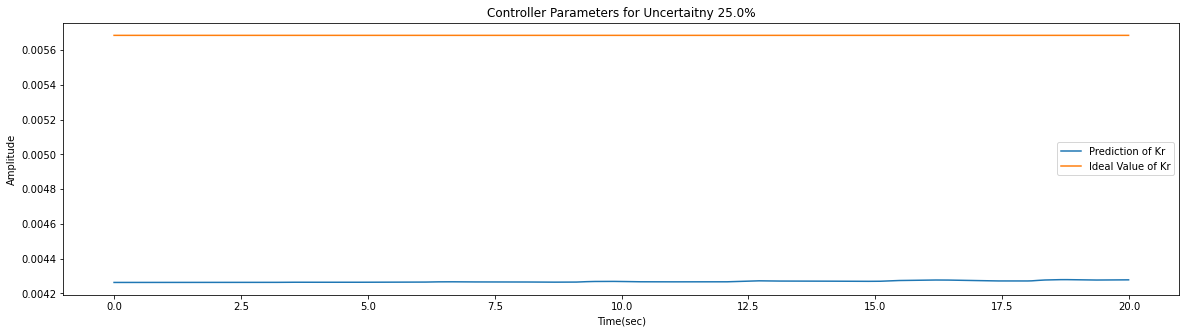

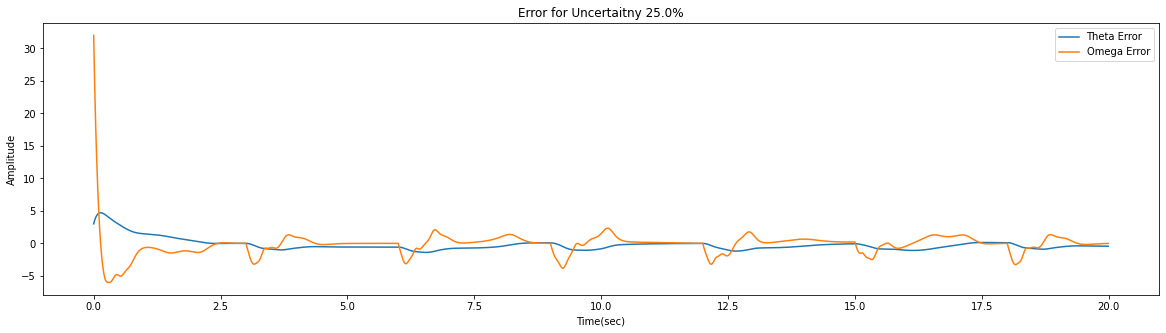

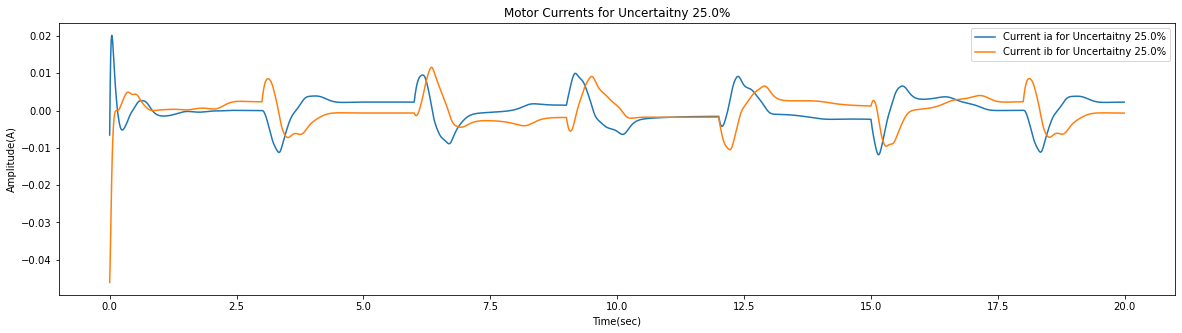

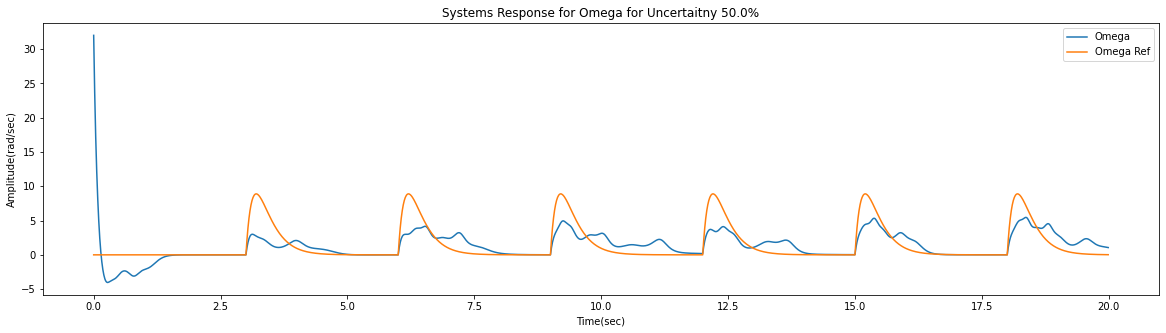

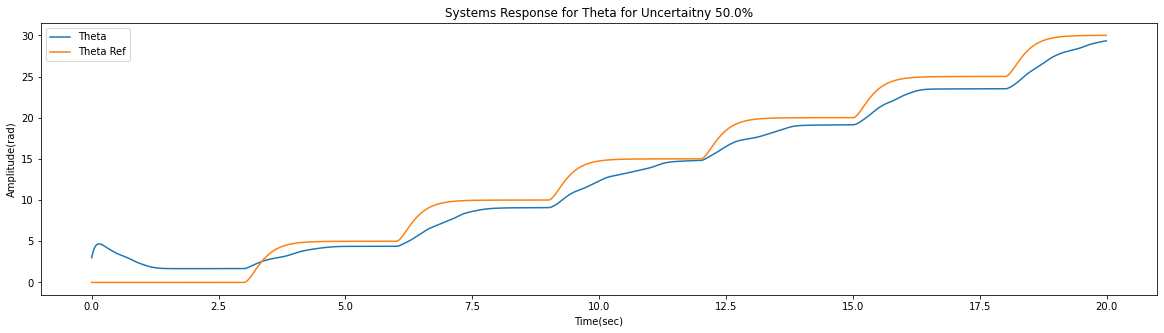

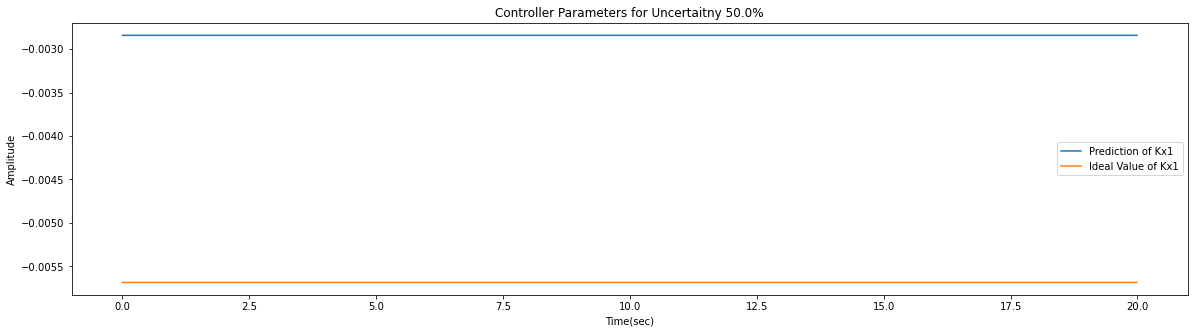

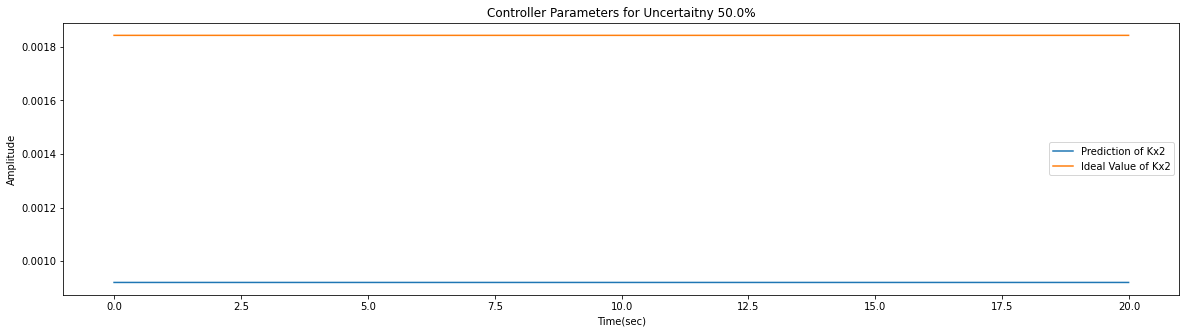

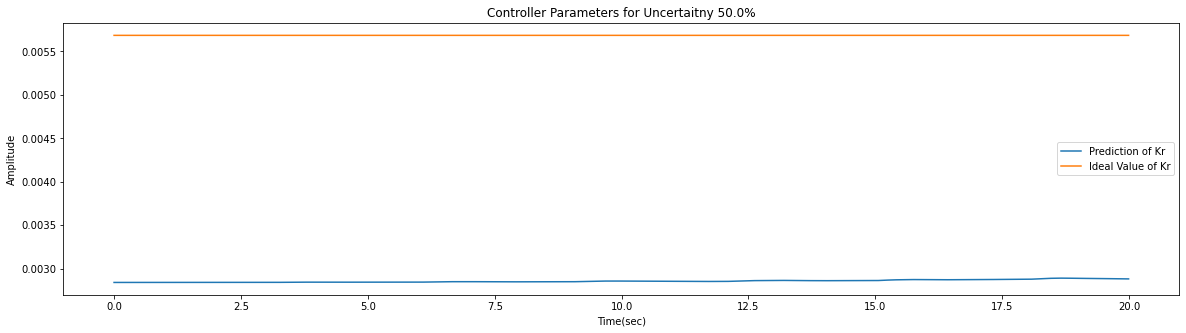

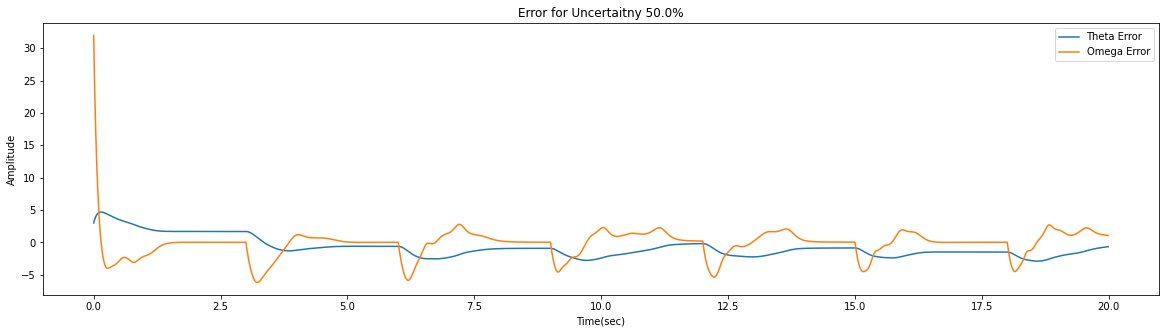

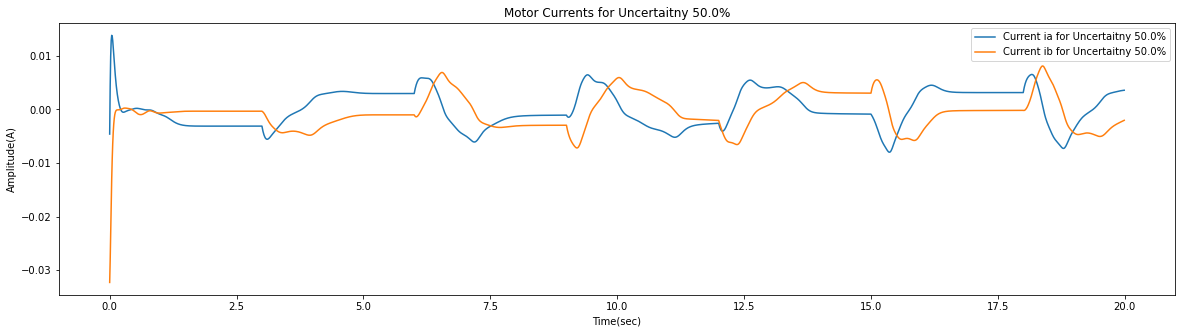

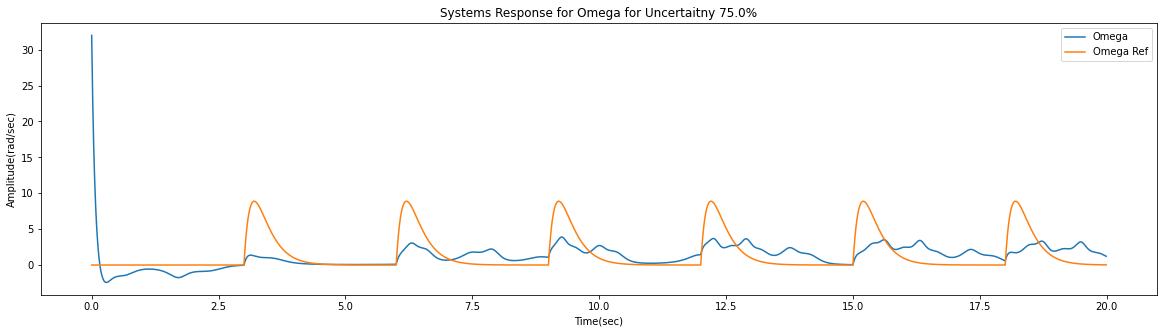

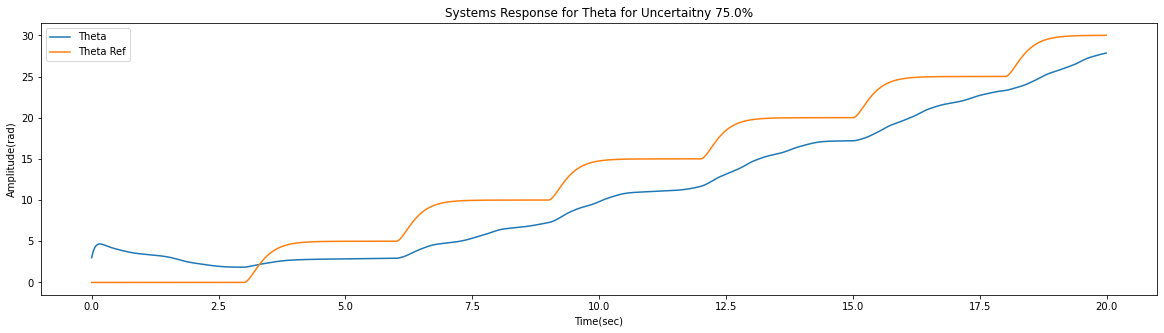

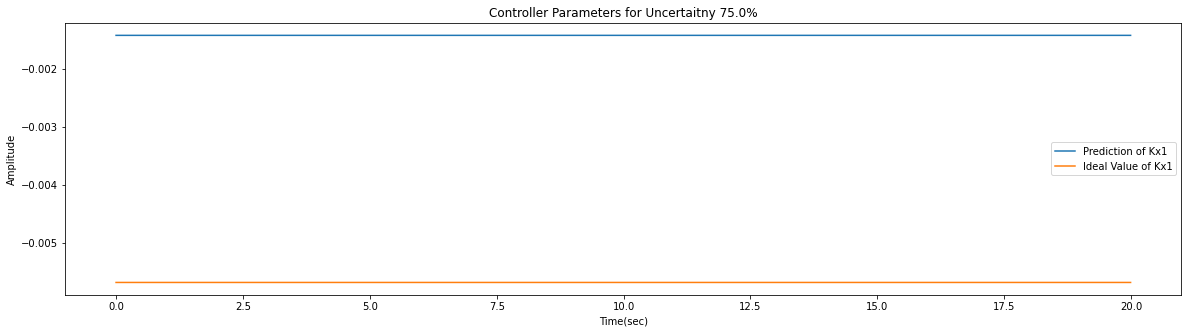

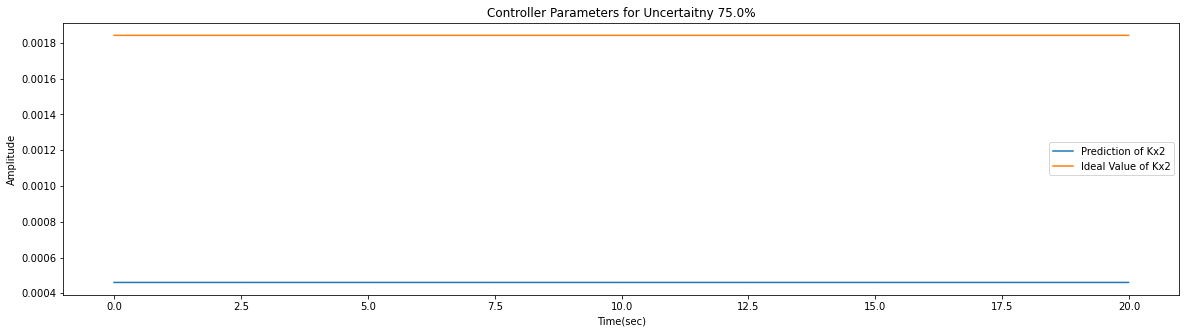

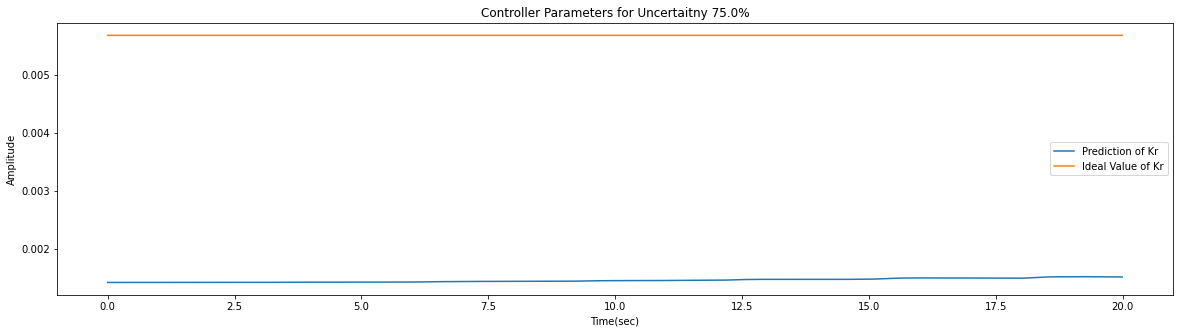

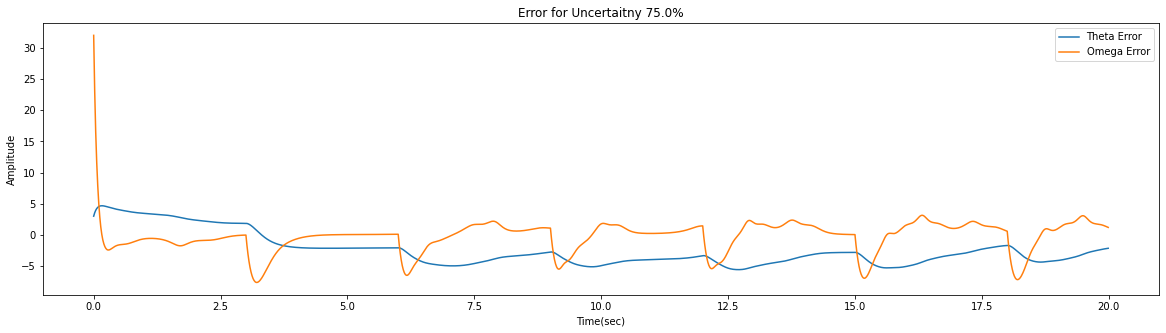

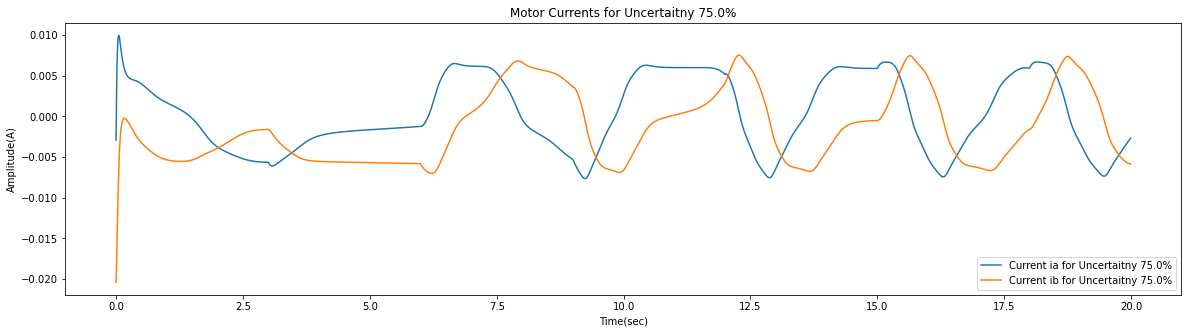

In [16]:
import torch
t = np.arange(0, 20, 0.01)
for a in l:
    xm = odeint(ref, xm0, t)
    theta_r, omega_r = xm[:,0], xm[:,1]
    theta = np.empty_like(t)
    omega = np.empty_like(t)
    e = np.empty((len(t),2))
    u = np.zeros(len(t))
    centers = rbfnet.centers
    stds = rbfnet.stds
    k=rbfnet.k
    Kx_ideal = np.array([AmA[1,0]/BL[1] , AmA[1,1]/BL[1]])
    Kr_ideal = B_m[1]/BL[1]
    sx = 1
    sr = 1
    sth = 1

    Gx = np.array([[50**(-4),0],[0, 50**(-4)]])
    gr = 10**(-6)
    Gth =10**(-6)
    Q = np.eye(2) * 10**(-3)

    P = solve_lyapunov(A_m.T,-Q)
    x0 = [3,32]
    e0 = x0-xm[0]
    xs = []
    xs.append(x0)
    Kx0 = (1-a)*Kx_ideal
    Kr0 = (1-a)*Kr_ideal
    th0 = np.zeros((5,1))
    Kxs = np.zeros((len(t), 2, 1))
    Krs = np.zeros(len(t))
    ths = np.zeros((len(t), k, 1))
    Kxs[0] = Kx0[:]
    Krs[0] = Kr0
    ths[0] = th0[:]
    theta[0] , omega[0] = x0
    e[0,:] = e0

    for i in range(1,len(t)):
        tspan = [t[i-1],t[i]]
        x = odeint(ODEx2, x0[:], tspan, args = (Kx0[:], Kr0, th0[:], centers, stds, k))
        error = x[1] - xm[i]
        kx = odeint(Kx2, np.squeeze(Kx0), tspan, args=(x[1], error, Gx, P, BL, sx))
        kr = odeint(Kr2, Kr0, tspan, args=(error[:], gr, P, BL, sr))
        th = odeint(Th, np.squeeze(th0), tspan, args=(x[1], error, Gth, P, BL, sth, centers, stds, k))
        kx0 = np.array(torch.unsqueeze(torch.tensor(kx[1][:]), dim=1))
        Kr0 = kr[1][:]
        th0 = np.array(torch.unsqueeze(torch.tensor(th[1][:]), dim=1))

        Kxs[i] = Kx0[:]
        Krs[i] = Kr0[:]
        ths[i] = th0[:]
        e[i] = error
        theta[i] = x[1][0]
        omega[i] = x[1][1]
        xs.append(x[1][:])
        x0 = x[1][:]

    Fx=np.zeros((5,1))
    for j in range(len(t)):
        for m in range(k):
            Fx[m] = rbf(theta[j],centers[m],stds[m])
        u = Kxs[j, 0, 0]*theta[j] + Kxs[j,1,0]*omega[:] + Krs[j]*theta_c[j]+np.squeeze(np.dot((ths[j].T),Fx))

    ia = -u*np.sin(theta)
    ib = u*np.cos(theta)

    plt.figure(figsize = (20,5))
    plt.plot(t, omega, label = 'Omega')
    plt.plot(t, omega_r, label = 'Omega Ref')
    plt.title('Systems Response for Omega for Uncertaitny '+ str(a*100)+"%") 
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude(rad/sec)")
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize = (20,5))
    plt.plot(t, theta, label = 'Theta')
    plt.plot(t, theta_r, label = 'Theta Ref')
    plt.title('Systems Response for Theta for Uncertaitny '+ str(a*100)+"%")
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude(rad)")
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize = (20,5))
    plt.plot(t, Kxs[:,0], label = 'Prediction of Kx1')
    plt.plot(t, [np.squeeze(Kx_ideal)[0]]*len(t), label = 'Ideal Value of Kx1')
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude")
    plt.title('Controller Parameters for Uncertaitny '+ str(a*100)+"%")
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize = (20,5))
    plt.plot(t, Kxs[:,1], label = 'Prediction of Kx2')
    plt.plot(t, [np.squeeze(Kx_ideal)[1]]*len(t), label = 'Ideal Value of Kx2')
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude")
    plt.title('Controller Parameters for Uncertaitny '+ str(a*100)+"%")
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize = (20,5))
    plt.plot(t, Krs, label = 'Prediction of Kr')
    plt.plot(t, [Kr_ideal]*len(t), label = 'Ideal Value of Kr')
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude")
    plt.title('Controller Parameters for Uncertaitny '+ str(a*100)+"%")
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize = (20,5))
    plt.plot(t, e[:,0], label = "Theta Error")
    plt.plot(t, e[:,1], label = "Omega Error")
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude")
    plt.title('Error for Uncertaitny '+ str(a*100)+"%")
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(t, ia, label = 'Current ia for Uncertaitny '+ str(a*100)+"%")
    plt.plot(t, ib, label = 'Current ib for Uncertaitny '+ str(a*100)+"%")
    plt.title('Motor Currents for Uncertaitny '+ str(a*100)+"%")
    plt.xlabel("Time(sec)")
    plt.ylabel("Amplitude(A)")
    plt.legend(loc='best')
    plt.show()


